# Personal Energy Usage 
<hr/>
Objective: 
<hr/>

In [417]:
# vis 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(rc = {'figure.figsize': (11,8)})

# pliers
import pandas as pd
import numpy as np

from datetime import datetime

# Contents
- [Data Ingestion](#Data-Ingenstion)
- [Data Clean Up](#Data-Clean-up)
    - [Propane Data](#Propane-Data)
    - [Temperature Data](#Temperature-Data)
- [Visualize](#EDA---Visualize)
    - [Temperature Vis](#Temperature-Vis)
    - [Propaine Vis](#Propaine-Vis)
    - [Combined Vis](#Combined-Vis)
- [Combined DataFrames](#Combined-DataFrames)


# Data Ingestion

In [418]:
propane_df = pd.read_excel('../data/gas_used.xlsx')
print(propane_df.shape)
propane_df.head()

(7, 6)


,invoice number,transaction date,cost,gal,Environmental Compliance Fee,cost per gal
0,NaN,NaT,NaN,NaN,NaN,NaN
1,NaN,NaT,NaN,NaN,NaN,NaN
2,676952.0,2020-10-02,117.04,55.3,6.99,1.99
3,681181.0,2020-11-25,320.20,103.5,6.99,NaN
4,685620.0,2020-12-26,205.99,100.0,6.99,1.99


### Data Dictonary for Temp data

T2M_RANGE MERRA2 1/2x1/2 Temperature Range at 2 Meters (C) 							
T2M_MAX MERRA2 1/2x1/2 Maximum Temperature at 2 Meters (C) 							
T2M_MIN MERRA2 1/2x1/2 Minimum Temperature at 2 Meters (C) 							
T2M MERRA2 1/2x1/2 Temperature at 2 Meters (C) 							
TS MERRA2 1/2x1/2 Earth Skin Temperature (C) 							
T2MDEW MERRA2 1/2x1/2 Dew/Frost Point at 2 Meters (C) 							
T2MWET MERRA2 1/2x1/2 Wet Bulb Temperature at 2 Meters (C) 							


In [419]:
# temp data from 

temp_df = pd.read_csv('../data/Daily_20200801_20210225_041d77N_74d28W_89a594ff - POWER_SinglePoint_Daily_20200801_20210225_041d77N_74d28W_89a594ff.csv',
                      skiprows=16) #nrows=10
print(temp_df.shape)
temp_df.head(2)

(209, 12)


,LAT,LON,YEAR,MO,DY,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M
0,41.77451,-74.27729,2020,8,1,14.37,24.58,15.59,15.42,31.20,16.83,24.66
1,41.77451,-74.27729,2020,8,2,8.73,24.33,20.65,20.57,28.83,20.11,24.30


# Data Clean up 
<hr/>

## Propane Data

In [420]:
propane_df

,invoice number,transaction date,cost,gal,Environmental Compliance Fee,cost per gal
0,NaN,NaT,NaN,NaN,NaN,NaN
1,NaN,NaT,NaN,NaN,NaN,NaN
2,676952.0,2020-10-02,117.04,55.3,6.99,1.99
3,681181.0,2020-11-25,320.20,103.5,6.99,NaN
4,685620.0,2020-12-26,205.99,100.0,6.99,1.99
5,688270.0,2021-01-20,224.70,109.4,6.99,1.99
6,692265.0,2021-02-17,205.99,100.0,6.99,1.99


In [421]:
# drop the nan rows and redefine the dataframe

propane_df = propane_df.drop([0,1])
propane_df.head()

,invoice number,transaction date,cost,gal,Environmental Compliance Fee,cost per gal
2,676952.0,2020-10-02,117.04,55.3,6.99,1.99
3,681181.0,2020-11-25,320.20,103.5,6.99,NaN
4,685620.0,2020-12-26,205.99,100.0,6.99,1.99
5,688270.0,2021-01-20,224.70,109.4,6.99,1.99
6,692265.0,2021-02-17,205.99,100.0,6.99,1.99


In [422]:
# rename columns

propane_df.rename(columns = {'transaction date':'date','invoice number':'invoice'}, inplace = True)
propane_df.head(1)

,invoice,date,cost,gal,Environmental Compliance Fee,cost per gal
2,676952.0,2020-10-02,117.04,55.3,6.99,1.99


In [423]:
# convert transaction date to timestamp

propane_df['date'] = pd.to_datetime(propane_df['date'])

In [424]:
# reset index 

propane_df.reset_index(drop=True, inplace = True)
propane_df.head(1)

,invoice,date,cost,gal,Environmental Compliance Fee,cost per gal
0,676952.0,2020-10-02,117.04,55.3,6.99,1.99


In [425]:
propane_df['date'][2]

Timestamp('2020-12-26 00:00:00')

In [426]:
propane_df

,invoice,date,cost,gal,Environmental Compliance Fee,cost per gal
0,676952.0,2020-10-02,117.04,55.3,6.99,1.99
1,681181.0,2020-11-25,320.20,103.5,6.99,NaN
2,685620.0,2020-12-26,205.99,100.0,6.99,1.99
3,688270.0,2021-01-20,224.70,109.4,6.99,1.99
4,692265.0,2021-02-17,205.99,100.0,6.99,1.99


In [427]:
# fill in NaN through calculation 

propane_df['cost per gal'][1] = round((320.20 / 103.5),2)

<ipython-input-427-26a5edec99c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propane_df['cost per gal'][1] = round((320.20 / 103.5),2)


In [428]:
propane_df

,invoice,date,cost,gal,Environmental Compliance Fee,cost per gal
0,676952.0,2020-10-02,117.04,55.3,6.99,1.99
1,681181.0,2020-11-25,320.20,103.5,6.99,3.09
2,685620.0,2020-12-26,205.99,100.0,6.99,1.99
3,688270.0,2021-01-20,224.70,109.4,6.99,1.99
4,692265.0,2021-02-17,205.99,100.0,6.99,1.99


--- done

## Temperature Data

In [429]:
temp_df.head()

,LAT,LON,YEAR,MO,DY,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M
0,41.77451,-74.27729,2020,8,1,14.37,24.58,15.59,15.42,31.20,16.83,24.66
1,41.77451,-74.27729,2020,8,2,8.73,24.33,20.65,20.57,28.83,20.11,24.30
2,41.77451,-74.27729,2020,8,3,10.66,24.39,16.23,16.03,30.16,19.50,24.56
3,41.77451,-74.27729,2020,8,4,5.20,21.13,20.19,20.17,23.65,18.45,21.14
4,41.77451,-74.27729,2020,8,5,10.10,20.91,16.51,16.40,26.28,16.19,21.01


In [430]:
# creating datatime from multiply columns
#  pandas 18 pd.to_datetime(df[['year', 'month', 'day']]) columns have to be that name

temp_df['DATE'] = pd.to_datetime((temp_df.YEAR*10000+temp_df.MO*100+temp_df.DY).apply(str),format='%Y%m%d')

In [431]:
# Remove old date columns

temp_df.drop(['YEAR','MO','DY'], axis = 1, inplace = True)

In [432]:
# set datetime to index

#temp_df.set_index('DATE', inplace = True)


In [433]:
temp_df.head(2)

,LAT,LON,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,DATE
0,41.77451,-74.27729,14.37,24.58,15.59,15.42,31.20,16.83,24.66,2020-08-01
1,41.77451,-74.27729,8.73,24.33,20.65,20.57,28.83,20.11,24.30,2020-08-02


In [434]:
temp_df.tail(3)

,LAT,LON,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,DATE
206,41.77451,-74.27729,6.09,-1.61,-1.76,-1.62,0.36,-5.72,-1.49,2021-02-23
207,41.77451,-74.27729,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,2021-02-24
208,41.77451,-74.27729,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,2021-02-25


Row 207 & 208 have incorrect data and need to be dropped

In [435]:
# Drop row 207 & 208

temp_df.drop([207,208], axis = 0, inplace = True)

In [436]:
# converts C to F 

# lambda function C to F
c_to_f = lambda x : (x * 9/5) + 32 
# apply lambda to TS & T2M
temp_df['TS'] = c_to_f(temp_df['TS'])
temp_df['T2M'] = c_to_f(temp_df['T2M'])

In [437]:
temp_df.head(2)

,LAT,LON,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,DATE
0,41.77451,-74.27729,14.37,76.244,15.59,15.42,31.20,16.83,76.388,2020-08-01
1,41.77451,-74.27729,8.73,75.794,20.65,20.57,28.83,20.11,75.740,2020-08-02


In [438]:
# simplyfy dataset

# creates a list of columns to drop
column_name = temp_df.columns
column_name = column_name.drop(['T2M','DATE','TS'])
# drops columns
temp_df.drop(column_name, inplace = True, axis = 1)
# rename to lower case 
temp_df.columns = map(str.lower, temp_df.columns)

In [439]:
# set datetime to index 

temp_df.set_index('date', inplace = True)

In [440]:
# Timdelta, duration of data

temp_df.index.max() - temp_df.index.min()

Timedelta('206 days 00:00:00')

In [441]:
temp_df

,ts,t2m
date,,
2020-08-01,76.244,76.388
2020-08-02,75.794,75.740
2020-08-03,75.902,76.208
2020-08-04,70.034,70.052
2020-08-05,69.638,69.818
...,...,...
2021-02-19,21.218,21.452
2021-02-20,19.166,19.310
2021-02-21,12.992,17.258


# EDA - Visualize
<hr/>

### Temperature Vis

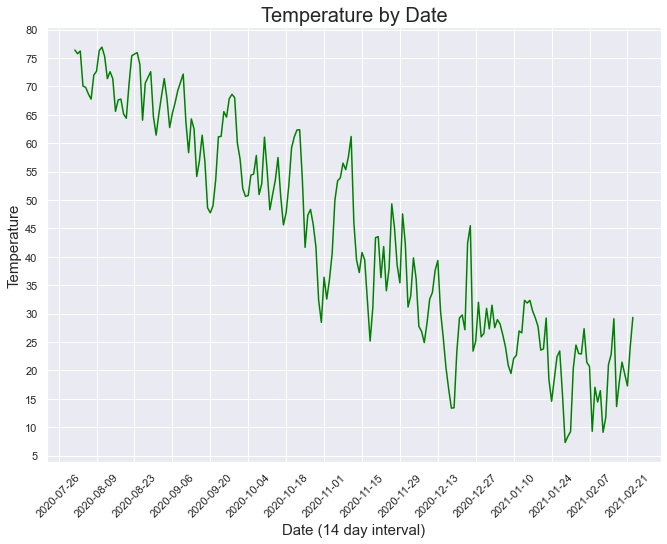

In [442]:
# Temperature Vis

plt.figure(figsize = (11,8))
ax = sns.lineplot(data = temp_df, x = 'date',
                             y = 't2m',
                             color = 'green');

# x & y labels
plt.title('Temperature by Date', size = 20)
plt.xlabel('Date (14 day interval)', size = 15)
plt.ylabel('Temperature', size = 15)

# add more date ticks
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
# add more temp ticks
ax.xaxis.set_major_locator(ticker.MultipleLocator(14))
    #ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
# rotate xticks
plt.xticks(rotation = 45);



# to save fig
#plt.savefig()

### Propane Vis

In [443]:
propane_df

,invoice,date,cost,gal,Environmental Compliance Fee,cost per gal
0,676952.0,2020-10-02,117.04,55.3,6.99,1.99
1,681181.0,2020-11-25,320.20,103.5,6.99,3.09
2,685620.0,2020-12-26,205.99,100.0,6.99,1.99
3,688270.0,2021-01-20,224.70,109.4,6.99,1.99
4,692265.0,2021-02-17,205.99,100.0,6.99,1.99


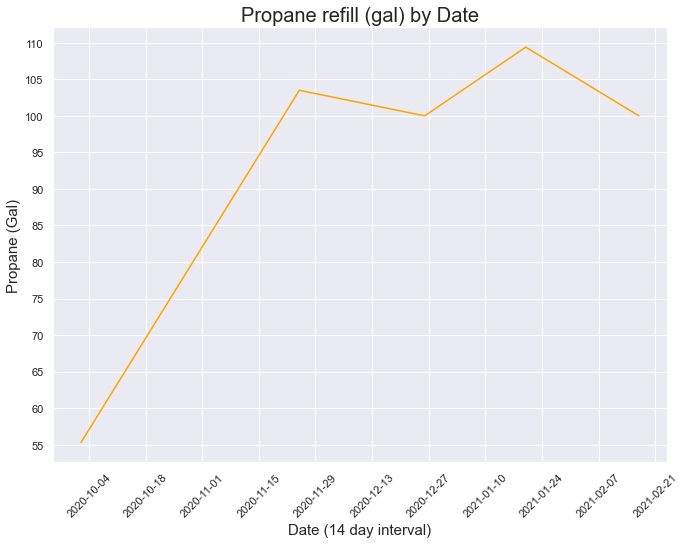

In [444]:
# Propane Vis

plt.figure(figsize = (11,8))
ax = sns.lineplot(data = propane_df, x = 'date',
                             y = 'gal',
                             color = 'orange');



# x & y labels
plt.title('Propane refill (gal) by Date', size = 20)
plt.xlabel('Date (14 day interval)', size = 15)
plt.ylabel('Propane (Gal)', size = 15)

# add more date ticks
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
# add more temp ticks
ax.xaxis.set_major_locator(ticker.MultipleLocator(14))
    #ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
# rotate xticks
plt.xticks(rotation = 45);


### Combined Vis

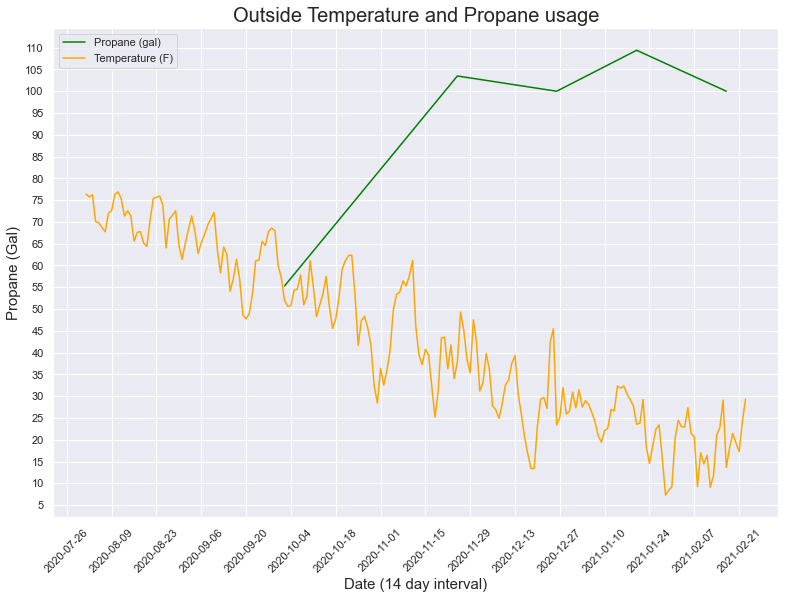

In [445]:
# Propane Vis

plt.figure(figsize = (13,9))
ax = sns.lineplot(data = propane_df, x = 'date',
                             y = 'gal',
                             color = 'green',
                             label = 'Propane (gal)');

ax = sns.lineplot(data = temp_df, x = 'date',
                             y = 't2m',
                             color = 'orange',
                             label = 'Temperature (F)');

# x & y labels
plt.title('Outside Temperature and Propane usage', size = 20)
plt.xlabel('Date (14 day interval)', size = 15)
plt.ylabel('Propane (Gal)', size = 15)

# add 
ax.legend()

# add more date ticks
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
# add more temp ticks
ax.xaxis.set_major_locator(ticker.MultipleLocator(14))
    #ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
# rotate xticks
plt.xticks(rotation = 45);


# Combined DataFrames
<hr/>

In [452]:
df = propane_df.drop(['invoice','cost','Environmental Compliance Fee',], axis = 1).copy()
df

,date,gal,cost per gal
0,2020-10-02,55.3,1.99
1,2020-11-25,103.5,3.09
2,2020-12-26,100.0,1.99
3,2021-01-20,109.4,1.99
4,2021-02-17,100.0,1.99


In [465]:
# creates temperture mean for time period inbetween propaine_df dates

In [465]:
# initial temperature reading 

initial_temp_reading = round( temp_df.loc[ 
                            (df['date'][0] - pd.Timedelta(weeks=4)): (df['date'][0] - pd.Timedelta(days=1)) 
                        ]['ts'].mean(),2 )
initial_temp_reading

61.45

In [515]:
# 
avg_temp_list = [initial_temp_reading]
n_days = [12]

In [519]:
# var for loop 

end_of_range = len( df['date'] ) -1
for n in range(0, end_of_range  ):

    if n_date >= 10:
        break
    
    
    # assigns start date 
    date_start = df['date'][n]
    # assigns end date
    date_end = df['date'][n + 1]
    
    
    # n of days between [date_start to date_end]
    n_days.append( int(str( date_end - date_start ).split(' ')[0]) )
    
    
    # slices datetime and Calcualtes MEAN for 'ts'
    avg_temp_list.append( round( temp_df.loc[ date_start: (date_end - pd.Timedelta(days=1)) ]['ts'].mean(),2 ) )
    # print TEMP for debuging 
    temp = temp_df.loc[ date_start: (date_end - pd.Timedelta(days=1)) ]['ts'].mean()
    print(f'number {n},  date {date_start} to {date_end} Temp Mean {temp}.')
    print()
    
    
    
    

number 0,  date 2020-10-02 00:00:00 to 2020-11-25 00:00:00 Temp Mean 46.916999999999994.

number 1,  date 2020-11-25 00:00:00 to 2020-12-26 00:00:00 Temp Mean 32.05516129032258.

number 2,  date 2020-12-26 00:00:00 to 2021-01-20 00:00:00 Temp Mean 26.78792.

number 3,  date 2021-01-20 00:00:00 to 2021-02-17 00:00:00 Temp Mean 18.09435714285714.



In [467]:
# Examine avg_temp_list list

np.array(avg_temp_list)

array([61.45, 46.92, 32.06, 26.79, 18.09, 46.92, 32.06, 26.79, 18.09])

In [517]:
# join .mean columns

df['avg_temp'] = np.array(temp_average)
df['days'] = np.array(n_days)
df

,date,gal,cost per gal,avg_temp,days
0,2020-10-02,55.3,1.99,61.45,12
1,2020-11-25,103.5,3.09,46.92,54
2,2020-12-26,100.0,1.99,32.06,31
3,2021-01-20,109.4,1.99,26.79,25
4,2021-02-17,100.0,1.99,18.09,28


# Write to csv

In [460]:
df

,date,gal,cost per gal,avg_temp
0,2020-10-02,55.3,1.99,61.45
1,2020-11-25,103.5,3.09,46.92
2,2020-12-26,100.0,1.99,32.06
3,2021-01-20,109.4,1.99,26.79
4,2021-02-17,100.0,1.99,18.09


In [462]:
df.to_csv('../data/clean_df.csv', index=False) 

In [471]:
date_start

Timestamp('2021-01-20 00:00:00')

In [472]:
date_end - 

Timestamp('2021-02-17 00:00:00')

In [473]:
date_end - date_start

Timedelta('28 days 00:00:00')

In [507]:
m = (date_end - date_start)
m.dt.hours


AttributeError: 'Timedelta' object has no attribute 'dt'

In [513]:
int(str(m).split(' ')[0])

28

In [470]:
temp_df

,ts,t2m
date,,
2020-08-01,76.244,76.388
2020-08-02,75.794,75.740
2020-08-03,75.902,76.208
2020-08-04,70.034,70.052
2020-08-05,69.638,69.818
...,...,...
2021-02-19,21.218,21.452
2021-02-20,19.166,19.310
2021-02-21,12.992,17.258
